# ___Проект 2. Разведывательный анализ данных___

## Первичный отсмотр данных

In [2073]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind
import random as r

pd.set_option('display.max_rows', 50)  # показывать больше строк
pd.set_option('display.max_columns', 50)  # показывать больше колонок

students = pd.read_csv('stud_math.csv')

### Предобработка

In [2074]:
def info_(col_name):
    display(col_name.hist())
    display(col_name.describe())
    display(col_name.value_counts())
    display(col_name.unique())


def iqr_func(column_name):
    # функция вычисляет 25, 75 квартиль, межквартильное расстояние и границы разброса
    # column_name - название колнки, value1 - первая граница, value2 - крайняя граница
    # bins - кол-во стобцов на графике
    perc25 = column_name.quantile(0.25)
    perc75 = column_name.quantile(0.75)
    IQR = perc75 - perc25

    print(
        f'25 персинтиль: {perc25}, 75 персинтиль: {perc75}, IQR: {IQR}, границы выбросов: {perc25-1.5*IQR}, {perc75+1.5*IQR}')

    column_name.plot(kind='box')
#     display(column_name.value_counts())


def num_nan(col_name):  # заменяем пустые значения на медиану
    median_ = col_name.median()
    col_name.fillna(value=median_, inplace=True, axis=0)


def obj_nan(col_name):  # заменяем пустые значения на наиболее часто встречающиеся
    mode_ = col_name.mode()[0]
    col_name.fillna(value=mode_, inplace=True, axis=0)


def choice(col_name):
    # функция для рандомного распределения пустых значений между
    # двумя выбранными
    my_list = []
    for i in col_name[col_name.isnull() == True].index:
        my_list.append(i)
    choice_list = []
    for i in range(len(my_list)):
        val_list = ['yes', 'no']
        r.seed()
        i = val_list[r.randint(0, len(val_list)-1)]
        choice_list.append(i)
    choice = pd.Series(choice_list, index=my_list)
    col_name.fillna(value=choice, inplace=True, axis=0)

In [2075]:
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

## Первичный анализ данных в столбцах

In [2076]:
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


### school — аббревиатура школы

<AxesSubplot:>

count     395
unique      2
top        GP
freq      349
Name: school, dtype: object

GP    349
MS     46
Name: school, dtype: int64

array(['GP', 'MS'], dtype=object)

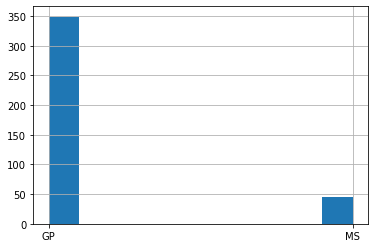

In [2077]:
info_(students.school)

Из графика видно, что школ, имеющихся в датафрейме всего 2, причем в школе MS 
достаточно мало учеников по сравнению со школой GP

### sex — пол ученика ('F' - женский, 'M' - мужской)

<AxesSubplot:>

count     395
unique      2
top         F
freq      208
Name: sex, dtype: object

F    208
M    187
Name: sex, dtype: int64

array(['F', 'M'], dtype=object)

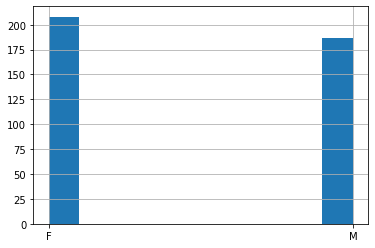

In [2078]:
info_(students.sex)

Здесь видно, что пола у учеников как и положено 2, всего значений в сумме 395.
Соответственно пропусков нет

### age — возраст ученика (от 15 до 22)

<AxesSubplot:>

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

array([18, 17, 15, 16, 19, 22, 20, 21], dtype=int64)

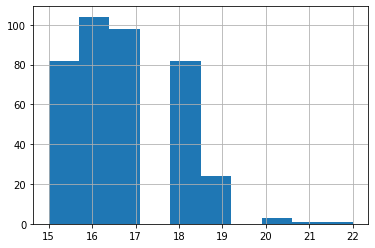

In [2079]:
info_(students.age)

25 персинтиль: 16.0, 75 персинтиль: 18.0, IQR: 2.0, границы выбросов: 13.0, 21.0


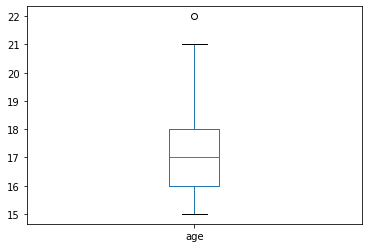

In [2080]:
iqr_func(students.age)

По правилу межквартильного размаха, видно, что возраст в 21 и более можно считать выбросами, поэтому можно не учитывать этих учеников в датафрейме

In [2081]:
students.drop(students[students.age > 20].index, inplace=True)

### address — тип адреса ученика ('U' - городской, 'R' - за городом)

<AxesSubplot:>

count     376
unique      2
top         U
freq      294
Name: address, dtype: object

U    294
R     82
Name: address, dtype: int64

array(['U', nan, 'R'], dtype=object)

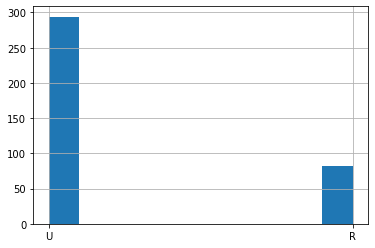

In [2082]:
info_(students.address)

Видим, что из 395 строк, значение address имеют только 376. Заменим пустые значения на наиболее встречающийся показатель

In [2083]:
obj_nan(students.address)

In [2084]:
display(students.address.value_counts())

U    311
R     82
Name: address, dtype: int64

###  famsize — размер семьи('LE3' <= 3, 'GT3' >3)

<AxesSubplot:>

count     366
unique      2
top       GT3
freq      259
Name: famsize, dtype: object

GT3    259
LE3    107
Name: famsize, dtype: int64

array([nan, 'GT3', 'LE3'], dtype=object)

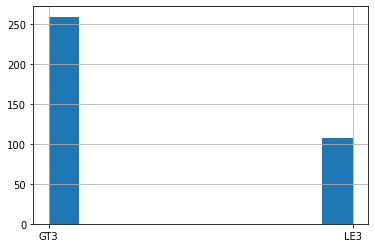

In [2085]:
info_(students.famsize)

In [2086]:
obj_nan(students.famsize)

### Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

<AxesSubplot:>

count     348
unique      2
top         T
freq      312
Name: Pstatus, dtype: object

T    312
A     36
Name: Pstatus, dtype: int64

array(['A', nan, 'T'], dtype=object)

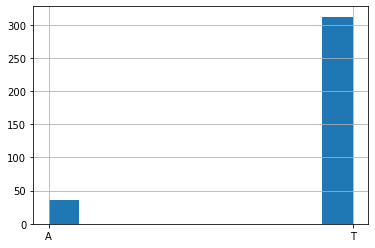

In [2087]:
info_(students.Pstatus)

In [2088]:
obj_nan(students.Pstatus)

### Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

<AxesSubplot:>

count    390.000000
mean       2.753846
std        1.097285
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

4.0    131
2.0    102
3.0     96
1.0     58
0.0      3
Name: Medu, dtype: int64

array([ 4.,  1.,  3.,  2., nan,  0.])

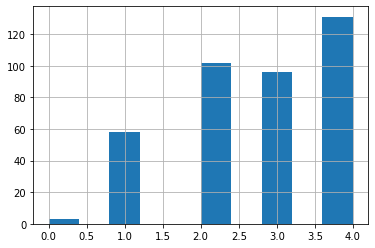

In [2089]:
info_(students.Medu)

25 персинтиль: 2.0, 75 персинтиль: 4.0, IQR: 2.0, границы выбросов: -1.0, 7.0


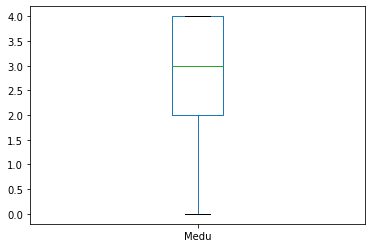

In [2090]:
iqr_func(students.Medu)

Видим, что имеются несколько пропущенных значений. Заменим их на медианное значение столбца. 0 по правилу межквартильного размаха входит в допустимое значение, хоть количество и мало, учтем его

In [2091]:
num_nan(students.Medu)

### Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

<AxesSubplot:>

count    369.000000
mean       2.623306
std        2.231591
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

2.0     106
3.0      96
4.0      88
1.0      76
0.0       2
40.0      1
Name: Fedu, dtype: int64

array([ 4.,  1.,  2.,  3., 40., nan,  0.])

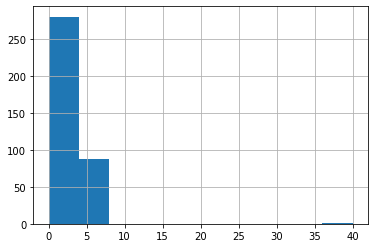

In [2092]:
info_(students.Fedu)

25 персинтиль: 2.0, 75 персинтиль: 3.0, IQR: 1.0, границы выбросов: 0.5, 4.5


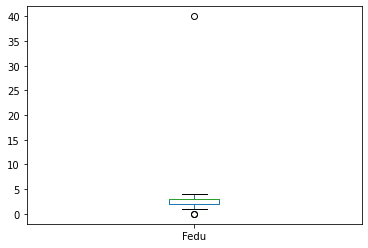

In [2093]:
iqr_func(students.Fedu)

Находим, что имеются пустые значения, а так же выброс. Так как значение 40, делаем предположение, что запись ошибочна, и имелась ввиду цифра 4. Меняем значение, убираем пустые значения. Значение 0 не входит в межквартильный размах, уберем эти строки

In [2094]:
students.Fedu = students.Fedu.replace(40, 4)
num_nan(students.Fedu)
students.drop(students[students.Fedu < 1].index, inplace=True)

### Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

<AxesSubplot:>

count       372
unique        5
top       other
freq        131
Name: Mjob, dtype: object

other       131
services     97
at_home      58
teacher      54
health       32
Name: Mjob, dtype: int64

array(['at_home', 'health', 'other', 'services', 'teacher', nan],
      dtype=object)

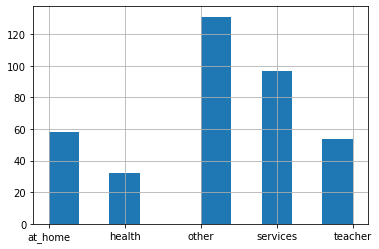

In [2095]:
info_(students.Mjob)

In [2096]:
obj_nan(students.Mjob)

### Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

<AxesSubplot:>

count       355
unique        5
top       other
freq        194
Name: Fjob, dtype: object

other       194
services    101
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

array(['teacher', 'other', nan, 'health', 'services', 'at_home'],
      dtype=object)

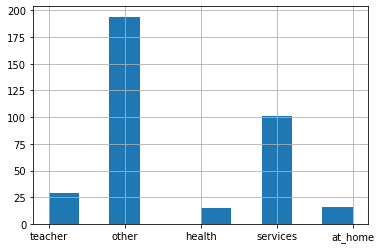

In [2097]:
info_(students.Fjob)

In [2098]:
obj_nan(students.Fjob)

### reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

<AxesSubplot:>

count        374
unique         4
top       course
freq         135
Name: reason, dtype: object

course        135
home          104
reputation    102
other          33
Name: reason, dtype: int64

array(['course', 'other', 'home', 'reputation', nan], dtype=object)

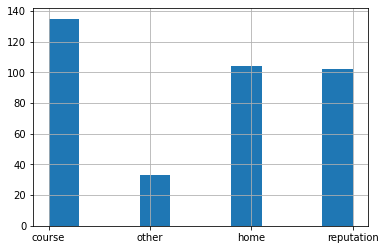

In [2099]:
info_(students.reason)

In [2100]:
obj_nan(students.reason)

### guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

<AxesSubplot:>

count        361
unique         3
top       mother
freq         247
Name: guardian, dtype: object

mother    247
father     86
other      28
Name: guardian, dtype: int64

array(['mother', 'father', 'other', nan], dtype=object)

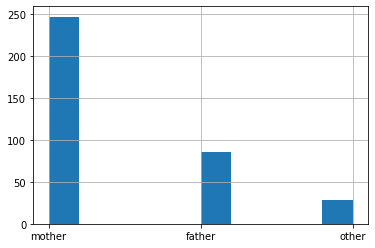

In [2101]:
info_(students.guardian)

In [2102]:
obj_nan(students.guardian)

### traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

<AxesSubplot:>

count    363.000000
mean       1.438017
std        0.695994
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

1.0    240
2.0     94
3.0     22
4.0      7
Name: traveltime, dtype: int64

array([ 2.,  1.,  3., nan,  4.])

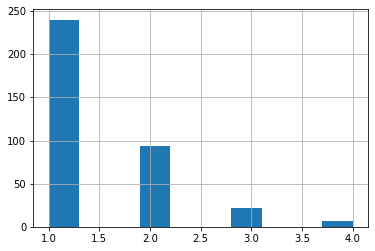

In [2103]:
info_(students.traveltime)

Из описания видим, что выбросы в числовых значениях отсутствуют, соответственно просто заменим пропущенные значения на медиану столбца

In [2104]:
num_nan(students.traveltime)

### studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

<AxesSubplot:>

count    384.000000
mean       2.039062
std        0.837150
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

2.0    193
1.0    101
3.0     64
4.0     26
Name: studytime, dtype: int64

array([ 2.,  3.,  1., nan,  4.])

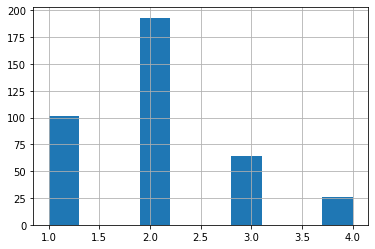

In [2105]:
info_(students.studytime)

Та же ситуация. Выбросы отсутствуют. Заменяем пустые значения на медиану

In [2106]:
num_nan(students.studytime)

### studytime, granular

<AxesSubplot:>

count    384.000000
mean      -6.117188
std        2.511450
min      -12.000000
25%       -6.000000
50%       -6.000000
75%       -3.000000
max       -3.000000
Name: studytime, granular, dtype: float64

-6.0     193
-3.0     101
-9.0      64
-12.0     26
Name: studytime, granular, dtype: int64

array([ -6.,  -9.,  -3.,  nan, -12.])

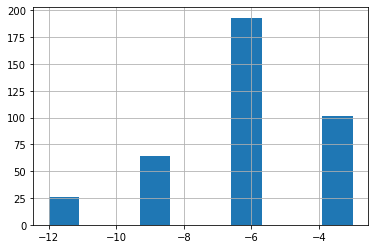

In [2107]:
info_(students['studytime, granular'])

In [2108]:
num_nan(students['studytime, granular'])

25 персинтиль: -6.0, 75 персинтиль: -3.0, IQR: 3.0, границы выбросов: -10.5, 1.5


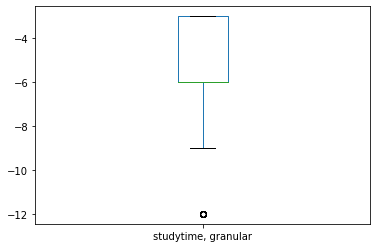

In [2109]:
iqr_func(students['studytime, granular'])

### failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

<AxesSubplot:>

count    370.000000
mean       0.324324
std        0.719607
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

0.0    292
1.0     49
2.0     16
3.0     13
Name: failures, dtype: int64

array([ 0.,  3., nan,  2.,  1.])

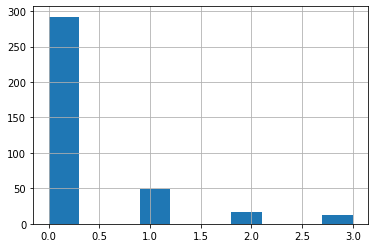

In [2110]:
info_(students.failures)

Выбросы отсутствуют. Повторяем операцию

In [2111]:
num_nan(students.failures)

### schoolsup — дополнительная образовательная поддержка (yes или no)

<AxesSubplot:>

count     383
unique      2
top        no
freq      332
Name: schoolsup, dtype: object

no     332
yes     51
Name: schoolsup, dtype: int64

array(['yes', 'no', nan], dtype=object)

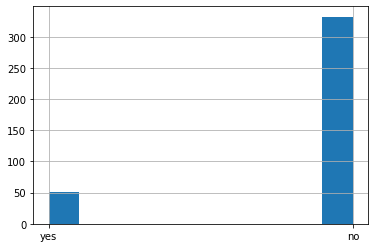

In [2112]:
info_(students.schoolsup)

Так как имеются значения только YES и NO попробуем рандомно распределить пустые значения между ними

In [2113]:
choice(students.schoolsup)

### famsup — семейная образовательная поддержка (yes или no)

<AxesSubplot:>

count     352
unique      2
top       yes
freq      218
Name: famsup, dtype: object

yes    218
no     134
Name: famsup, dtype: int64

array(['no', 'yes', nan], dtype=object)

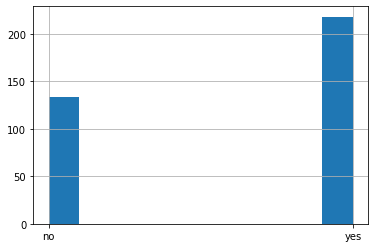

In [2114]:
info_(students.famsup)

Так же рандомно распределим пустые значения между yes и no 

In [2115]:
choice(students.famsup)

### paid — дополнительные платные занятия по математике (yes или no)

<AxesSubplot:>

count     351
unique      2
top        no
freq      197
Name: paid, dtype: object

no     197
yes    154
Name: paid, dtype: int64

array(['no', nan, 'yes'], dtype=object)

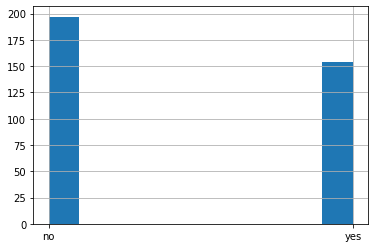

In [2116]:
info_(students.paid)

In [2117]:
choice(students.paid)

### activities — дополнительные внеучебные занятия (yes или no)

<AxesSubplot:>

count     377
unique      2
top       yes
freq      193
Name: activities, dtype: object

yes    193
no     184
Name: activities, dtype: int64

array(['no', 'yes', nan], dtype=object)

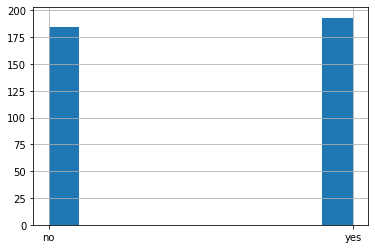

In [2118]:
info_(students.activities)

In [2119]:
choice(students.activities)

### nursery — посещал детский сад (yes или no)

<AxesSubplot:>

count     375
unique      2
top       yes
freq      298
Name: nursery, dtype: object

yes    298
no      77
Name: nursery, dtype: int64

array(['yes', 'no', nan], dtype=object)

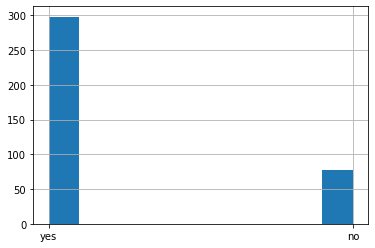

In [2120]:
info_(students.nursery)

In [2121]:
choice(students.nursery)

### higher — хочет получить высшее образование (yes или no)

<AxesSubplot:>

count     374
unique      2
top       yes
freq      356
Name: higher, dtype: object

yes    356
no      18
Name: higher, dtype: int64

array(['yes', nan, 'no'], dtype=object)

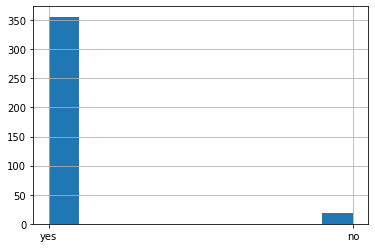

In [2122]:
info_(students.higher)

In [2123]:
choice(students.higher)

### internet — наличие интернета дома (yes или no)

<AxesSubplot:>

count     357
unique      2
top       yes
freq      302
Name: internet, dtype: object

yes    302
no      55
Name: internet, dtype: int64

array([nan, 'yes', 'no'], dtype=object)

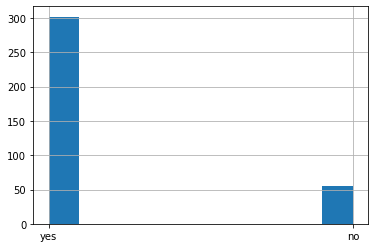

In [2124]:
info_(students.internet)

In [2125]:
choice(students.internet)

### romantic — в романтических отношениях (yes или no)

<AxesSubplot:>

count     360
unique      2
top        no
freq      238
Name: romantic, dtype: object

no     238
yes    122
Name: romantic, dtype: int64

array(['no', nan, 'yes'], dtype=object)

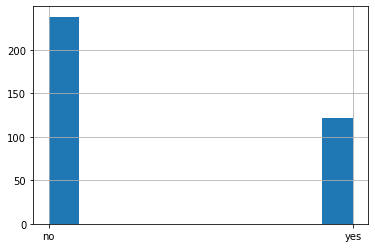

In [2126]:
info_(students.romantic)

In [2127]:
choice(students.romantic)

### famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

<AxesSubplot:>

count    364.000000
mean       3.934066
std        0.927715
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

 4.0    181
 5.0     97
 3.0     61
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

array([ 4.,  5.,  3., nan, -1.,  2.,  1.])

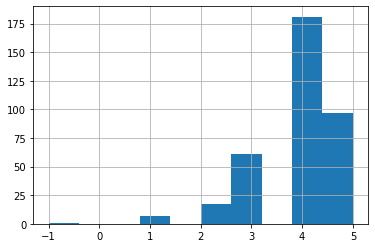

In [2129]:
info_(students.famrel)

Видим, что имеется выброс в -1 т.к. этот показатель не был указан в условиях, избавляемся от него. А так же избавимся от пустых значений, заменив их на медианное

In [2131]:
students.drop(students[students.famrel < 0].index, inplace=True)

25 персинтиль: 4.0, 75 персинтиль: 5.0, IQR: 1.0, границы выбросов: 2.5, 6.5


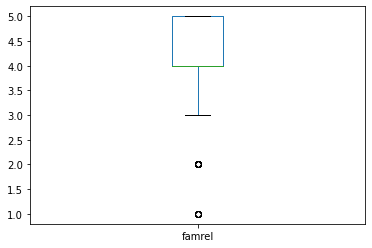

In [2132]:
iqr_func(students.famrel)

Видим, что по правилу межквартильного размаха, нижней границей выбросов является 2,5, но используя здавый смысл, можно предположить, что семейные отношения могут играть важную роль в успеваемости ученика, поэтому отсеивать "выбросы" не будем

In [2134]:
num_nan(students.famrel)

### freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

<AxesSubplot:>

count    379.000000
mean       3.226913
std        0.992679
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

3.0    152
4.0    110
2.0     62
5.0     37
1.0     18
Name: freetime, dtype: int64

array([ 3.,  2.,  4.,  1.,  5., nan])

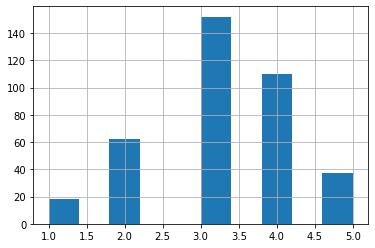

In [2135]:
info_(students.freetime)

Выбросы не наблюдаются, поэтому просто заменим пустые значения на медиану

In [2136]:
num_nan(students.freetime)

### goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

<AxesSubplot:>

count    382.000000
mean       3.107330
std        1.116095
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

3.0    125
2.0     99
4.0     84
5.0     51
1.0     23
Name: goout, dtype: int64

array([ 4.,  3.,  2.,  1.,  5., nan])

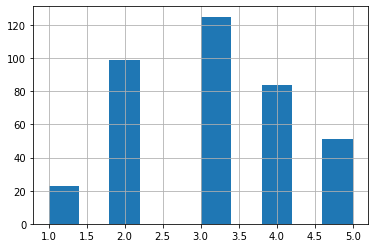

In [2137]:
info_(students.goout)

Повторяем операцию

In [2138]:
num_nan(students.goout)

### health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

<AxesSubplot:>

count    375.000000
mean       3.544000
std        1.390403
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

5.0    137
3.0     87
4.0     63
1.0     45
2.0     43
Name: health, dtype: int64

array([ 3.,  5.,  1.,  2.,  4., nan])

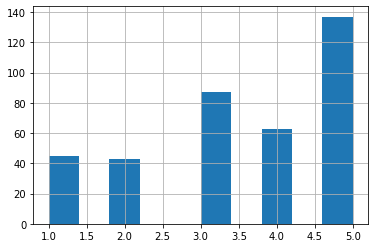

In [2139]:
info_(students.health)

In [2140]:
num_nan(students.health)

### absences — количество пропущенных занятий

<AxesSubplot:>

count    378.000000
mean       7.261905
std       23.610852
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

0.0      111
2.0       59
4.0       53
6.0       31
8.0       20
10.0      17
12.0      12
14.0      11
3.0        7
16.0       6
7.0        6
18.0       5
5.0        5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

array([  6.,   4.,  10.,   2.,   0.,  16.,  nan,   7.,   8.,  25.,  14.,
        12.,  54.,  18.,  26.,  20.,  56.,  24.,  28.,   5.,  13.,  15.,
        22.,   3., 385.,  21.,   1.,  75.,  30.,  19.,   9.,  11.,  38.,
        40.,  23.,  17., 212.])

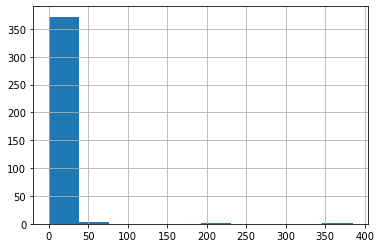

In [2141]:
info_(students.absences)

Достаточно большой разброс значений. Видим, что значений больше 100, всего 2. Уберем сначала их.

In [2142]:
students.drop(students[students.absences > 100].index, inplace=True)

<AxesSubplot:>

count    376.000000
mean       5.712766
std        8.109415
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

0.0     111
2.0      59
4.0      53
6.0      31
8.0      20
10.0     17
12.0     12
14.0     11
3.0       7
7.0       6
16.0      6
5.0       5
18.0      5
20.0      4
1.0       3
22.0      3
9.0       3
15.0      2
13.0      2
11.0      2
54.0      1
25.0      1
17.0      1
26.0      1
56.0      1
23.0      1
28.0      1
21.0      1
75.0      1
30.0      1
19.0      1
38.0      1
40.0      1
24.0      1
Name: absences, dtype: int64

array([ 6.,  4., 10.,  2.,  0., 16., nan,  7.,  8., 25., 14., 12., 54.,
       18., 26., 20., 56., 24., 28.,  5., 13., 15., 22.,  3., 21.,  1.,
       75., 30., 19.,  9., 11., 38., 40., 23., 17.])

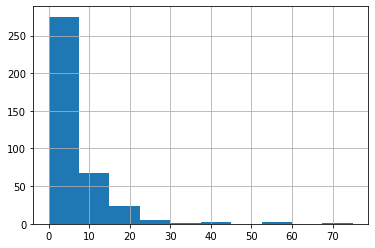

In [2143]:
info_(students.absences)

25 персинтиль: 0.0, 75 персинтиль: 8.0, IQR: 8.0, границы выбросов: -12.0, 20.0


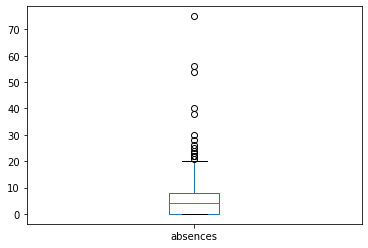

In [2144]:
iqr_func(students.absences)

По правилу межквартильного размаха видим, что выбросами считаются значения больше 20. Заменим их на медиану, чтобы не потерять объем данных

In [2145]:
students.loc[(students['absences'] > 20),
             'absences'] = students.absences.median()

Посмотрим, что получилось

25 персинтиль: 0.0, 75 персинтиль: 6.0, IQR: 6.0, границы выбросов: -9.0, 15.0


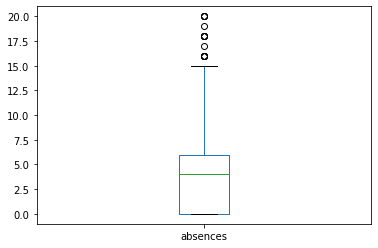

In [2146]:
iqr_func(students.absences)

По новым данным, выбросами считаются те, которые больше 15. Заменим и их на медиану, а заодно избавимся от пустых значений, так как теперь медианное значение будет близко к истинному

In [2147]:
students.loc[(students['absences'] > 15),
             'absences'] = students.absences.median()

In [2148]:
num_nan(students.absences)

### score — баллы по госэкзамену по математике

<AxesSubplot:>

count    382.000000
mean      52.238220
std       22.986435
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

50.0     53
55.0     46
0.0      37
75.0     33
65.0     31
60.0     31
40.0     29
70.0     27
45.0     26
80.0     15
30.0     15
90.0     12
35.0      8
25.0      7
85.0      5
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

array([ 30.,  50.,  75.,  55.,  95.,  45.,  60.,  70.,  80.,  25.,  40.,
        85.,  90.,  65., 100.,  35.,   0.,  nan,  20.])

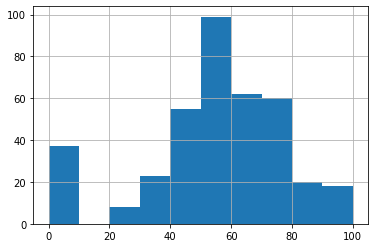

In [2149]:
info_(students.score)

Слишком много человек набрали 0 и 4 балла, что кажется подозрительно, есть вероятность, что записи ошибочны. 8% сдающих не могли сдать ровно на 4 балла, и практически 10% не сдать вовсе. Возможно это как-то связано со здоровьем, отношениями в семье, друзьями или своей парой. Возможно эти люди пропускали огромное количство занятий и те пропуски на самом деле были не выбросами

Для начала избавимся от пустых значений

In [2150]:
num_nan(students.score)

25 персинтиль: 43.75, 75 персинтиль: 70.0, IQR: 26.25, границы выбросов: 4.375, 109.375


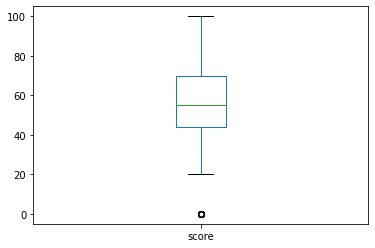

In [2151]:
iqr_func(students.score)

Видим, что выбросами можно считать значения, которые меньше 4.375. Поэтому заменим такие значения на медиану, но начиная от 4

In [2152]:
students.loc[(students['score'] < 4), 'score'] = students.score.median()

25 персинтиль: 50.0, 75 персинтиль: 70.0, IQR: 20.0, границы выбросов: 20.0, 100.0


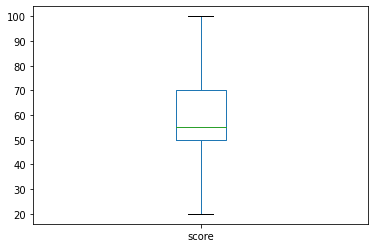

In [2153]:
iqr_func(students.score)

Первичная обработка данных проведена, теперь можно провести корреляционный анализ

## Корреляционный анализ

,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.154809,-0.152448,0.108559,0.015847,0.157744,-0.015847,0.024955,-0.009732,0.112640,-0.051891,0.116673,-0.105238
Medu,-0.154809,1.000000,0.616790,-0.167526,0.064845,-0.239584,-0.064845,-0.014562,0.031245,0.055729,-0.047161,0.098475,0.188161
Fedu,-0.152448,0.616790,1.000000,-0.139471,0.020428,-0.248312,-0.020428,-0.025212,-0.002132,0.044942,0.003295,0.017822,0.124088
traveltime,0.108559,-0.167526,-0.139471,1.000000,-0.107433,0.073356,0.107433,-0.020489,-0.009394,0.054338,-0.042454,-0.019175,-0.077526
studytime,0.015847,0.064845,0.020428,-0.107433,1.000000,-0.142029,-1.000000,0.042678,-0.122329,-0.050053,-0.068095,-0.009409,0.127457
failures,0.157744,-0.239584,-0.248312,0.073356,-0.142029,1.000000,0.142029,-0.033080,0.071758,0.102661,0.091753,0.015387,-0.232326
"studytime, granular",-0.015847,-0.064845,-0.020428,0.107433,-1.000000,0.142029,1.000000,-0.042678,0.122329,0.050053,0.068095,0.009409,-0.127457
famrel,0.024955,-0.014562,-0.025212,-0.020489,0.042678,-0.033080,-0.042678,1.000000,0.148012,0.049228,0.097326,-0.083895,0.048671
freetime,-0.009732,0.031245,-0.002132,-0.009394,-0.122329,0.071758,0.122329,0.148012,1.000000,0.287778,0.072983,0.046403,-0.001243
goout,0.112640,0.055729,0.044942,0.054338,-0.050053,0.102661,0.050053,0.049228,0.287778,1.000000,-0.007878,0.118324,-0.157241


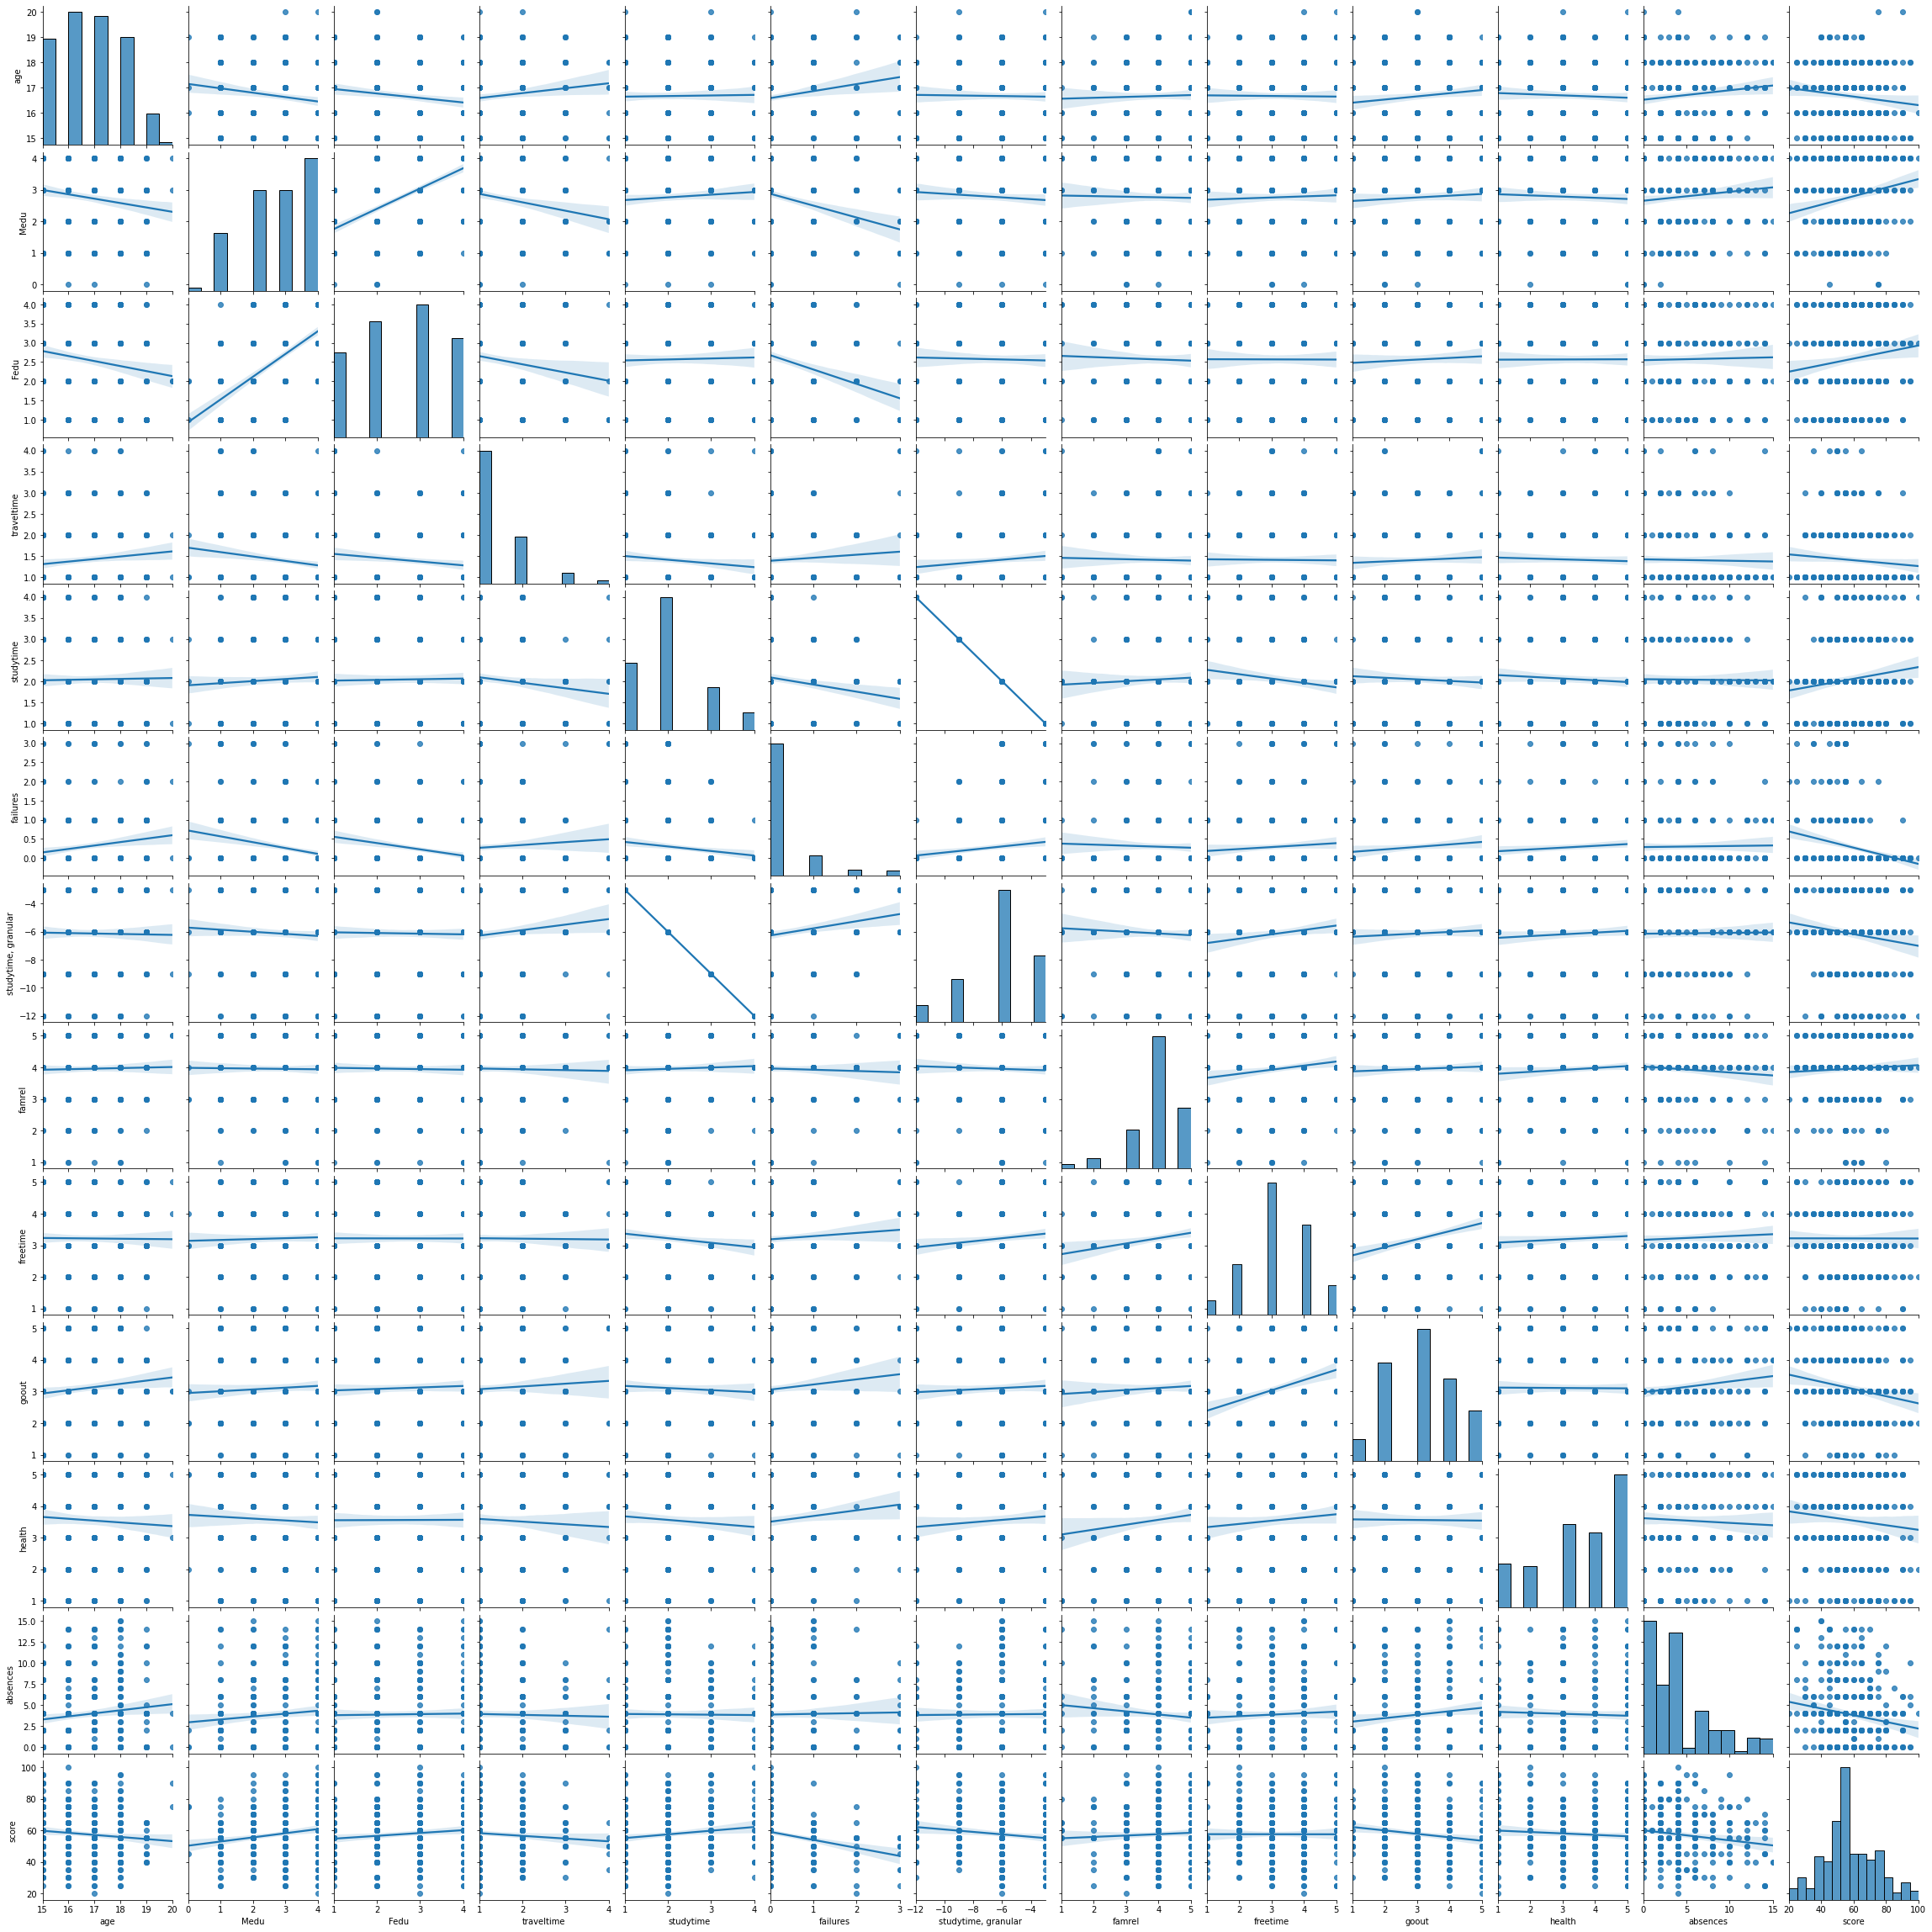

In [2068]:
sns.pairplot(students, kind='reg')
display(students.corr())

Итак видим, что со score у переменных не сильная корреляция. В датасете имеются 2 похожие величины studytime и studytime, granular. Они одинаково коррелируют со score, но с разынми знаками, поэтому избавимся от одного из них. Например от переменной с более длинным названием, к тому же у нее отрицательная корреляция

In [2156]:
students.drop('studytime, granular', axis=1, inplace=True)

KeyError: "['studytime, granular'] not found in axis"

## Анализ номинативных переменных

In [2157]:
students.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,GT3,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,yes,no,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,T,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,yes,no,yes,yes,yes,no,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,other,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


Составим список номинативных переменных

In [2163]:
nom_list = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
            'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health']

In [2159]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize=(14, 4))
    sns.boxplot(x=column, y='score',
                data=students.loc[students.loc[:, column].isin(
                    students.loc[:, column].value_counts().index[:10])],
                ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

Значений в номинативных переменных достаточно много, поэтому будем брать по 10 самых частотных.

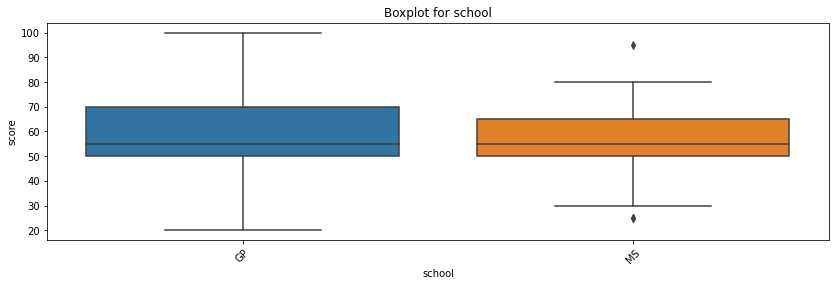

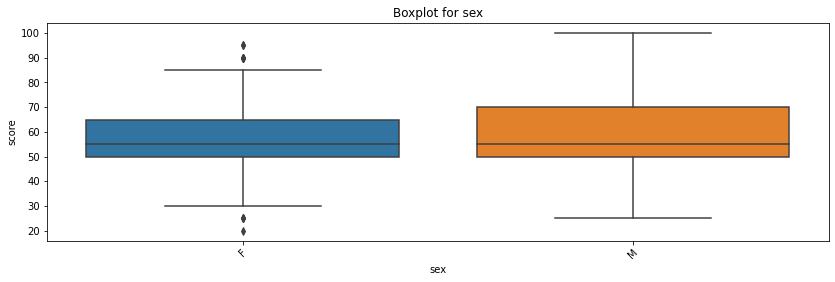

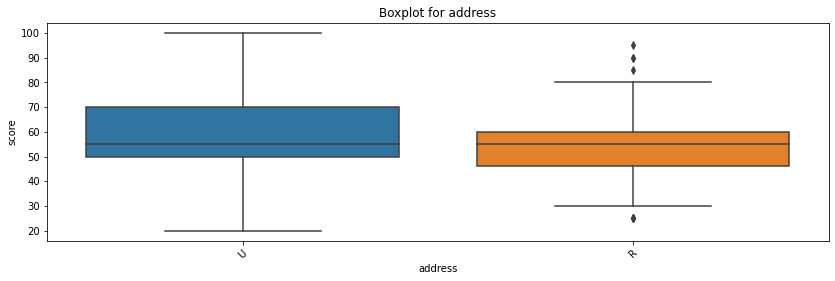

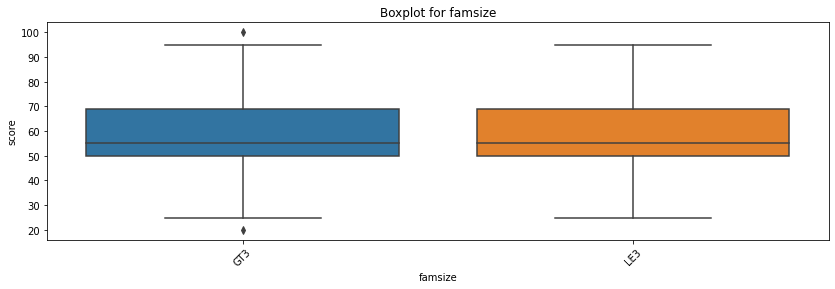

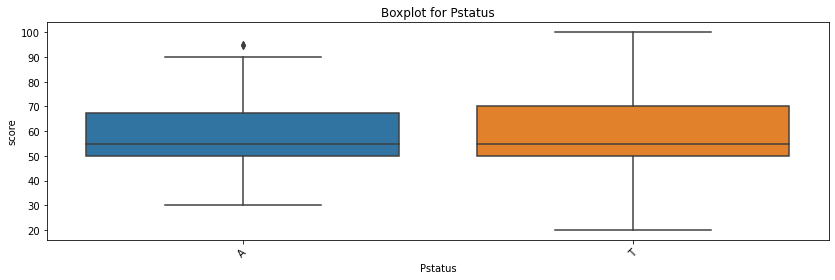

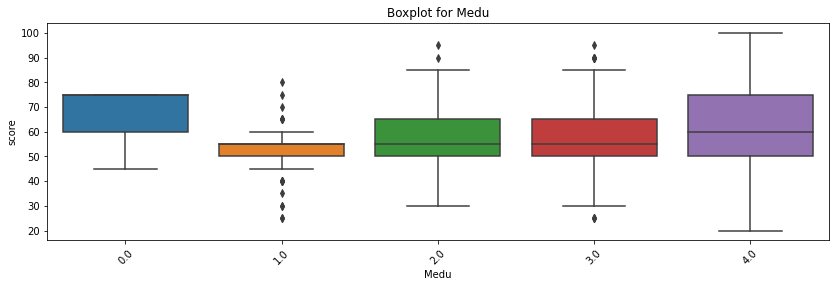

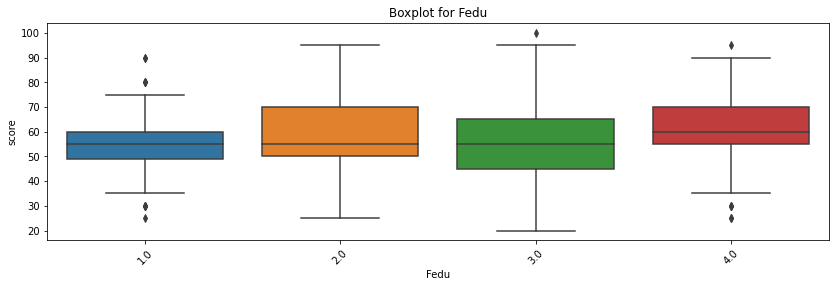

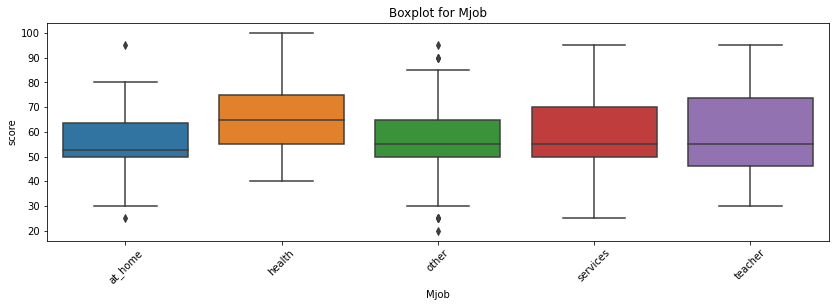

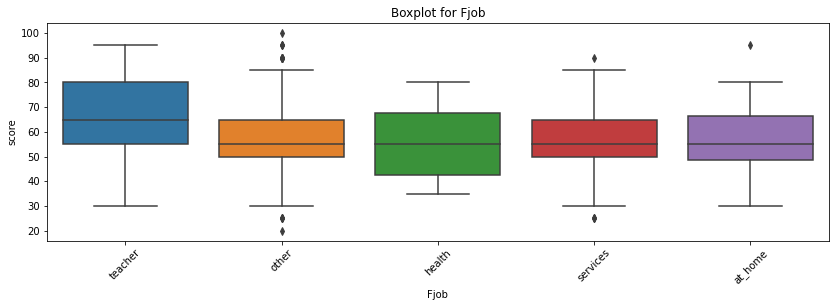

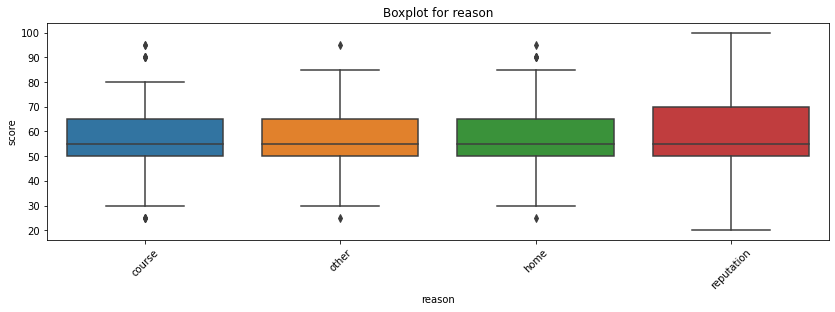

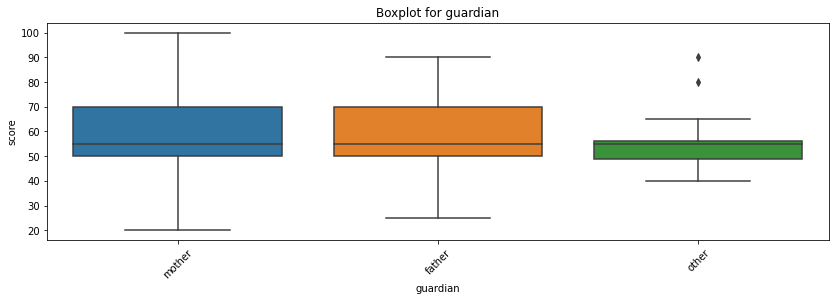

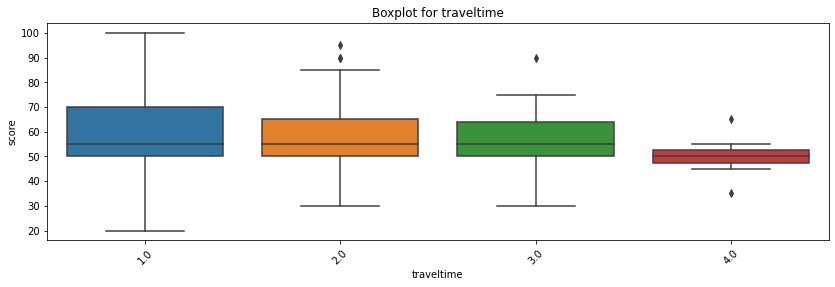

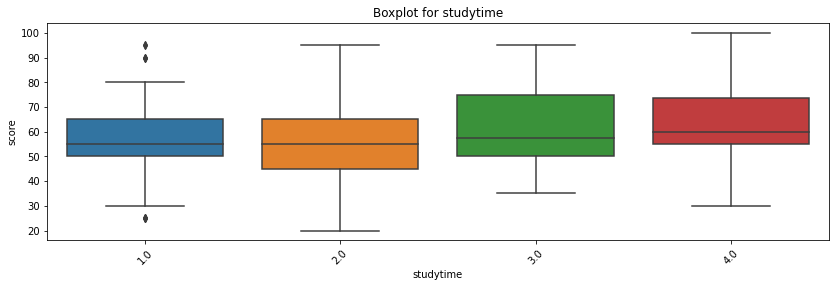

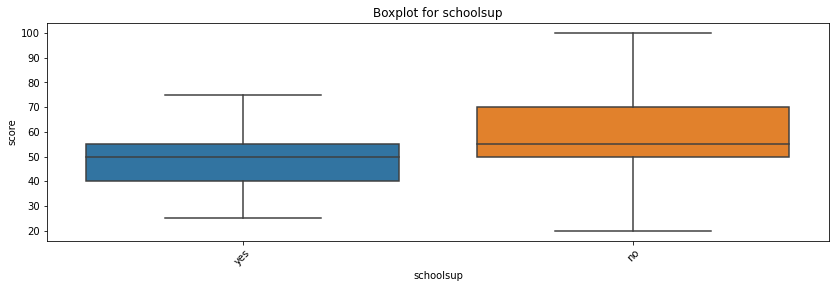

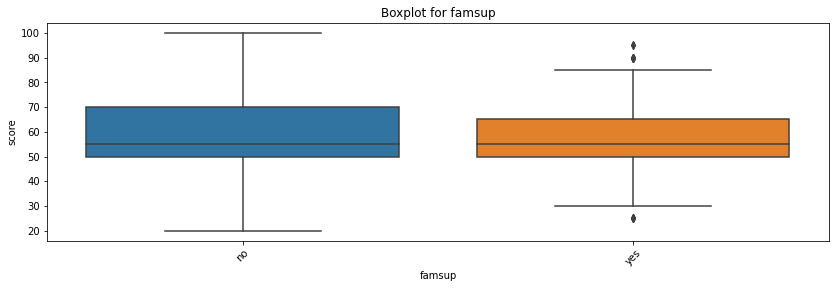

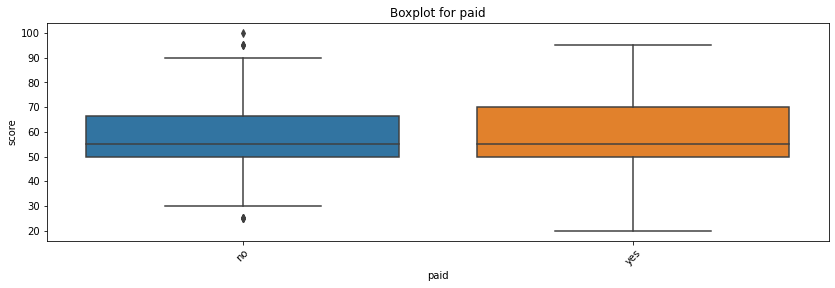

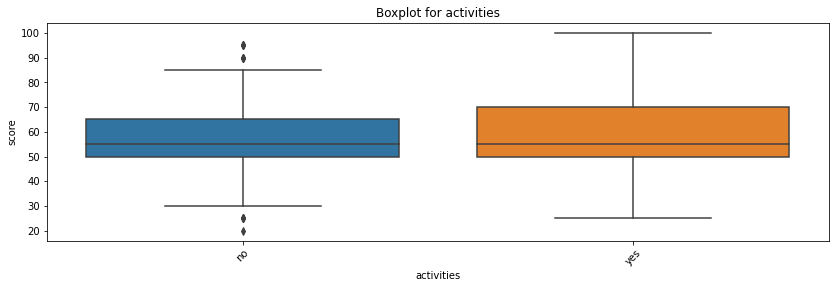

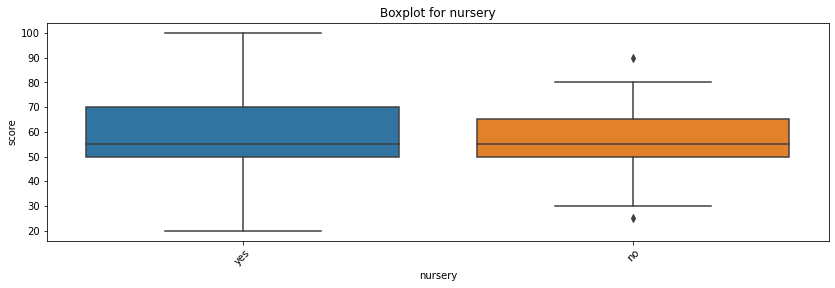

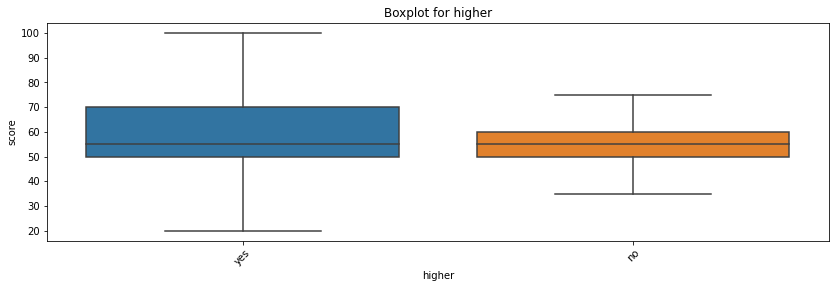

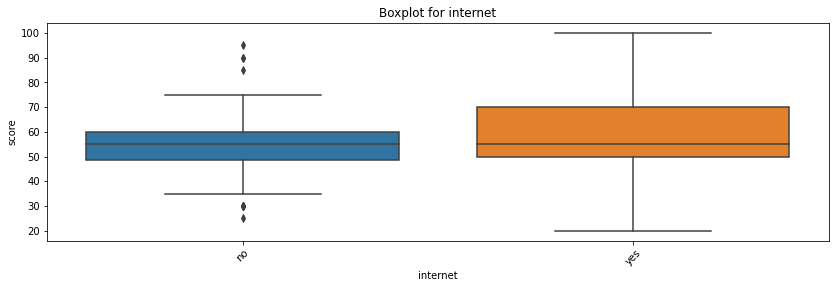

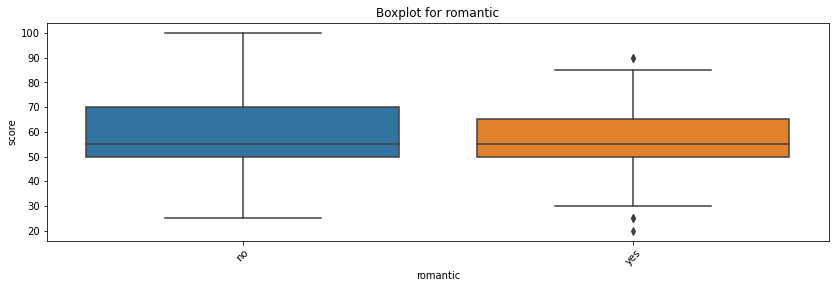

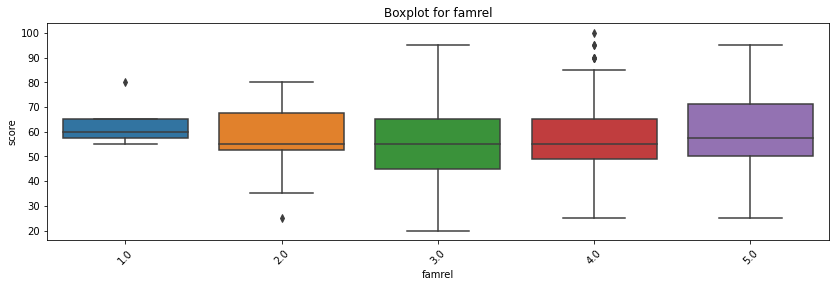

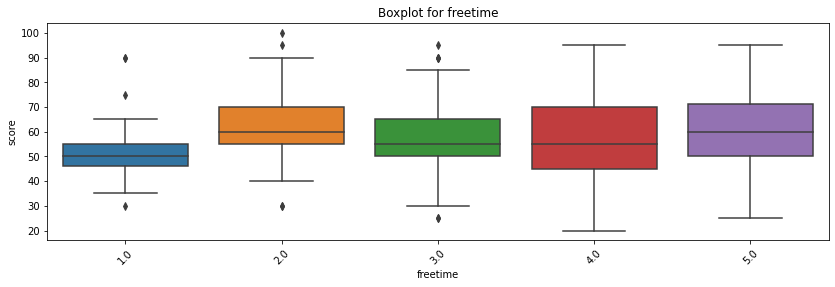

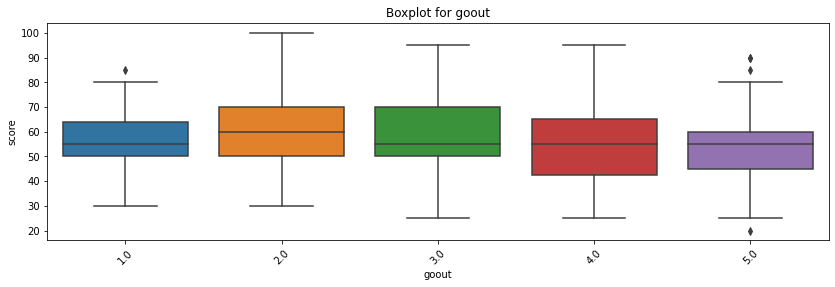

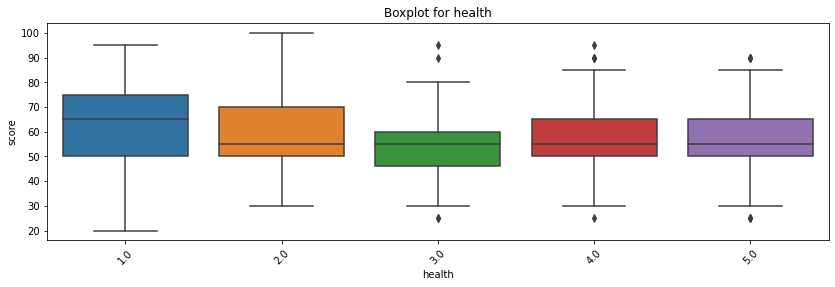

In [2164]:
for col in nom_list:
    get_boxplot(col)

Итак видим, что все параметры в большей или меньшей степени влияют на количество баллов по экзамену. Зa исключением таких как famsize, guardian. 

Проверим, есть ли статистическая разница в распределении баллов по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения баллов учеников по различным параметрам неразличимы.

In [2161]:
def get_stat_dif(column):
    cols = students.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column] == comb[0], 'score'],
                     students.loc[students.loc[:, column] == comb[1], 'score']).pvalue \
                <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [2166]:
for col in nom_list:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки Fedu
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки studytime
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки goout


In [2167]:
students_for_model = students.loc[:, [
    'sex', 'address', 'Medu', 'Fedu', 'Mjob', 'studytime', 'schoolsup', 'goout']]
students_for_model.head()

,sex,address,Medu,Fedu,Mjob,studytime,schoolsup,goout
0,F,U,4.0,4.0,at_home,2.0,yes,4.0
1,F,U,1.0,1.0,at_home,2.0,no,3.0
2,F,U,1.0,1.0,at_home,2.0,yes,2.0
3,F,U,4.0,2.0,health,3.0,no,2.0
4,F,U,3.0,3.0,other,2.0,no,2.0


Исходя из проделанной работы видим, что на балл ученика на экзамене влияют такие параметры как sex, address, Medu, Fedu, Mjob, studytime, schoolsup и goout. 